In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Dense, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-01-15 19:26:56.461212: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


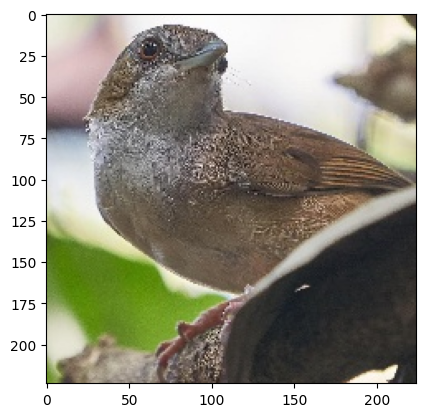

Shape of image: (224, 224, 3)


In [2]:
# Show an image from dataset and shape
DATA_PATH = 'Bird_Data'
img = cv2.imread(os.path.join(DATA_PATH, 'train/ABBOTTS BABBLER/001.jpg'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

print(f'Shape of image: {img.shape}')

In [4]:
# Show csv file and number of classes in dataset
classes = os.listdir(os.path.join(DATA_PATH, 'train'))
birds_csv = pd.read_csv(os.path.join(DATA_PATH, 'birds.csv'))
print(f'Number of classes in dataset: {len(classes)}')
birds_csv.head()

Number of classes in dataset: 525


,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


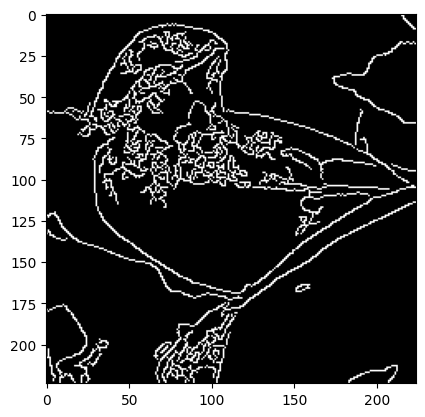

In [5]:
# Show edges on image
lines = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
lines = cv2.GaussianBlur(lines, (5, 5), 0)
lines = cv2.Canny(lines, 30, 150)
plt.imshow(lines, cmap='gray')
plt.show()

In [7]:
# Check for missing data
train_set = set(os.listdir(os.path.join(DATA_PATH, 'train')))
test_set = set(os.listdir(os.path.join(DATA_PATH, 'test')))

missing_classes = [test_file for test_file in test_set if test_file not in train_set]
num_missing = len(missing_classes)

if num_missing == 0:
    print("All files in the test directory exist in the train directory.")

else:
    print(f'{num_missing} files in the test directory do not exist in the train directory')
    print('Mismatched files:')
    for mismatched_file in missing_classes:
        print(f"- {mismatched_file}")

All files in the test directory exist in the train directory.
